In [1]:
# Predicting how many people survived ,confirmed and deaths in patricular region
# Linear Regression Problem

In [49]:
# import module
!pip install scikit-learn

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
# Reading
df = pd.read_csv('covid-19.csv',parse_dates=['Date'],dayfirst=True)
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [4]:
df.tail()

,Date,Country,Confirmed,Recovered,Deaths
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7
23687,2020-05-26,Zimbabwe,56,25,4


In [5]:
# Checking the shape - which means dimension
df.shape

(23688, 5)

In [6]:
df.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [7]:
# Current date
today = df[df.Date == '2020-05-26']
today

,Date,Country,Confirmed,Recovered,Deaths
23500,2020-05-26,Afghanistan,11831,1128,220
23501,2020-05-26,Albania,1029,803,33
23502,2020-05-26,Algeria,8697,4918,617
23503,2020-05-26,Andorra,763,676,51
23504,2020-05-26,Angola,70,18,4
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [8]:
# Sorting data with number of confirmed cases
max_confirmed_cases = today.sort_values(by='Confirmed',ascending=False)
max_confirmed_cases

,Date,Country,Confirmed,Recovered,Deaths
23674,2020-05-26,US,1680913,384902,98913
23523,2020-05-26,Brazil,391222,158593,24512
23640,2020-05-26,Russia,362342,131129,3807
23678,2020-05-26,United Kingdom,266599,1161,37130
23658,2020-05-26,Spain,236259,150376,27117
...,...,...,...,...,...
23661,2020-05-26,Suriname,11,9,1
23604,2020-05-26,MS Zaandam,9,0,2
23684,2020-05-26,Western Sahara,9,6,1
23632,2020-05-26,Papua New Guinea,8,8,0


In [9]:
top_country_confirmed = max_confirmed_cases[0:5]
top_country_confirmed

,Date,Country,Confirmed,Recovered,Deaths
23674,2020-05-26,US,1680913,384902,98913
23523,2020-05-26,Brazil,391222,158593,24512
23640,2020-05-26,Russia,362342,131129,3807
23678,2020-05-26,United Kingdom,266599,1161,37130
23658,2020-05-26,Spain,236259,150376,27117


In [10]:
# Checking the misssing values 
df.isnull()

,Date,Country,Confirmed,Recovered,Deaths
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
23683,False,False,False,False,False
23684,False,False,False,False,False
23685,False,False,False,False,False
23686,False,False,False,False,False


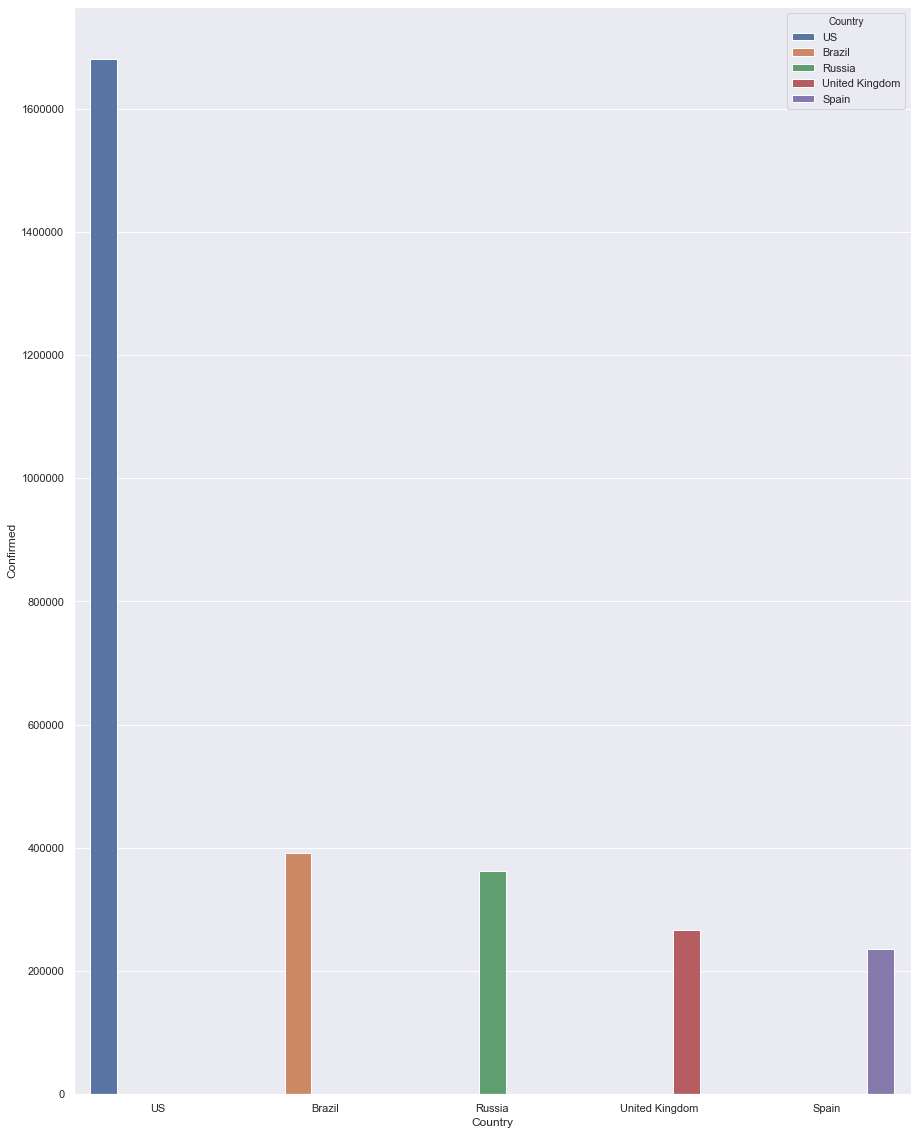

In [11]:
# Making bar plot for country with top confirmed cases 
sns.set(rc={'figure.figsize':(15,20)})
sns.barplot(x='Country',y='Confirmed',data=top_country_confirmed,hue='Country')
plt.show()

In [12]:
# Sorting data with number of death cases
max_death_cases = today.sort_values(by ='Deaths',ascending = False)
max_death_cases

,Date,Country,Confirmed,Recovered,Deaths
23674,2020-05-26,US,1680913,384902,98913
23678,2020-05-26,United Kingdom,266599,1161,37130
23585,2020-05-26,Italy,230555,144658,32955
23562,2020-05-26,France,182847,65997,28533
23658,2020-05-26,Spain,236259,150376,27117
...,...,...,...,...,...
23556,2020-05-26,Eritrea,39,39,0
23650,2020-05-26,Seychelles,11,11,0
23530,2020-05-26,Cambodia,124,122,0
23550,2020-05-26,Dominica,16,16,0


In [13]:
# Getting max num of death cases
top_country_death_cases = max_death_cases[0:5]
top_country_death_cases

,Date,Country,Confirmed,Recovered,Deaths
23674,2020-05-26,US,1680913,384902,98913
23678,2020-05-26,United Kingdom,266599,1161,37130
23585,2020-05-26,Italy,230555,144658,32955
23562,2020-05-26,France,182847,65997,28533
23658,2020-05-26,Spain,236259,150376,27117


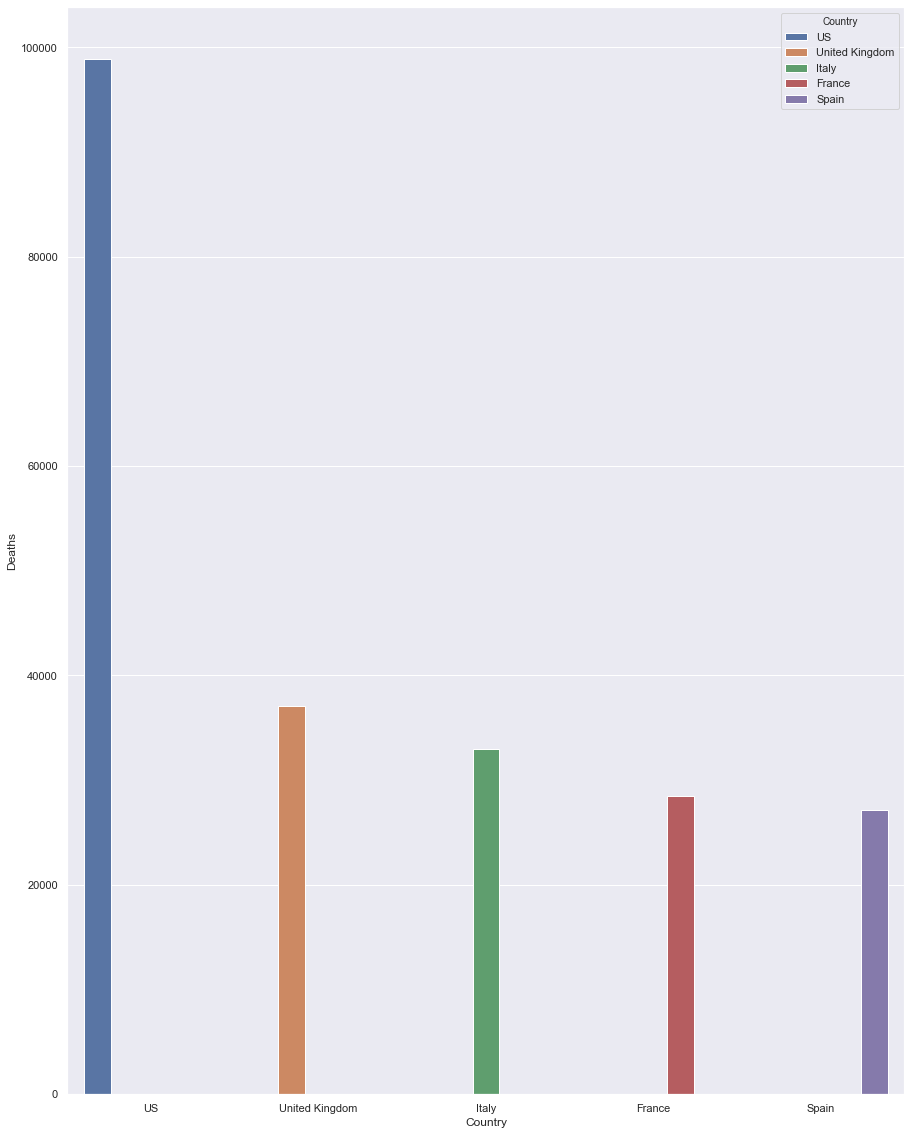

In [14]:
# Making the bar plot of Country with Deaths 
sns.set(rc={'figure.figsize':(15,20)})
sns.barplot(x='Country',y='Deaths',data=top_country_death_cases,hue='Country')
plt.show()

In [15]:
# Sorting data with respect to recovered cases
max_cured_cases = today.sort_values(by='Recovered',ascending=False)
max_cured_cases

,Date,Country,Confirmed,Recovered,Deaths
23674,2020-05-26,US,1680913,384902,98913
23566,2020-05-26,Germany,181200,161967,8372
23523,2020-05-26,Brazil,391222,158593,24512
23658,2020-05-26,Spain,236259,150376,27117
23585,2020-05-26,Italy,230555,144658,32955
...,...,...,...,...,...
23684,2020-05-26,Western Sahara,9,6,1
23657,2020-05-26,South Sudan,806,6,8
23575,2020-05-26,Holy See,12,2,0
23604,2020-05-26,MS Zaandam,9,0,2


In [16]:
# Getting top Recovered cases
top_cured_cases = max_cured_cases[0:5]
top_cured_cases

,Date,Country,Confirmed,Recovered,Deaths
23674,2020-05-26,US,1680913,384902,98913
23566,2020-05-26,Germany,181200,161967,8372
23523,2020-05-26,Brazil,391222,158593,24512
23658,2020-05-26,Spain,236259,150376,27117
23585,2020-05-26,Italy,230555,144658,32955


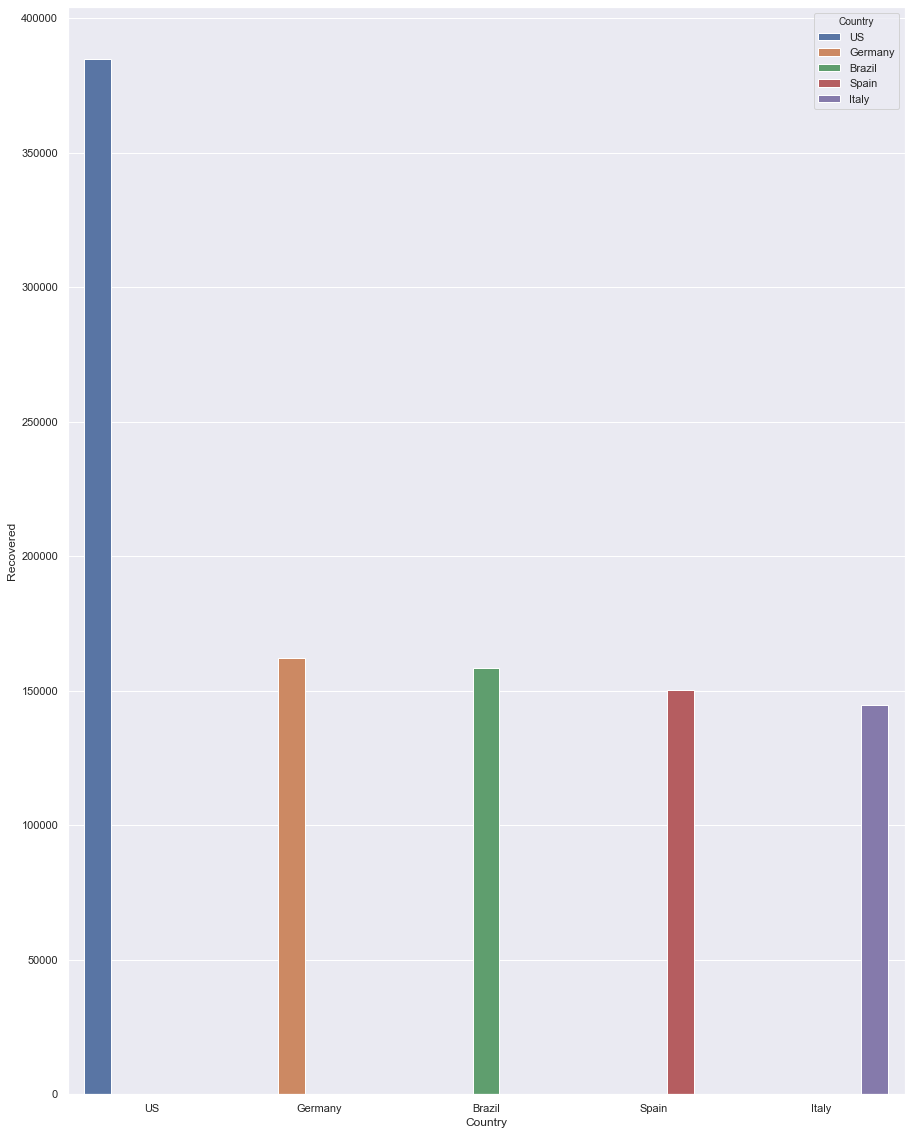

In [17]:
# Let's plot bar plot with top country repsect to recovered cases
sns.set(rc={'figure.figsize':(15,20)})
sns.barplot(x='Country',y='Recovered',data=top_cured_cases,hue='Country')
plt.show()

In [18]:
# US
us = df[df.Country=='US']
us

,Date,Country,Confirmed,Recovered,Deaths
174,2020-01-22,US,1,0,0
362,2020-01-23,US,1,0,0
550,2020-01-24,US,2,0,0
738,2020-01-25,US,2,0,0
926,2020-01-26,US,5,0,0
...,...,...,...,...,...
22922,2020-05-22,US,1600937,350135,95979
23110,2020-05-23,US,1622612,361239,97087
23298,2020-05-24,US,1643246,366736,97720
23486,2020-05-25,US,1662302,379157,98220


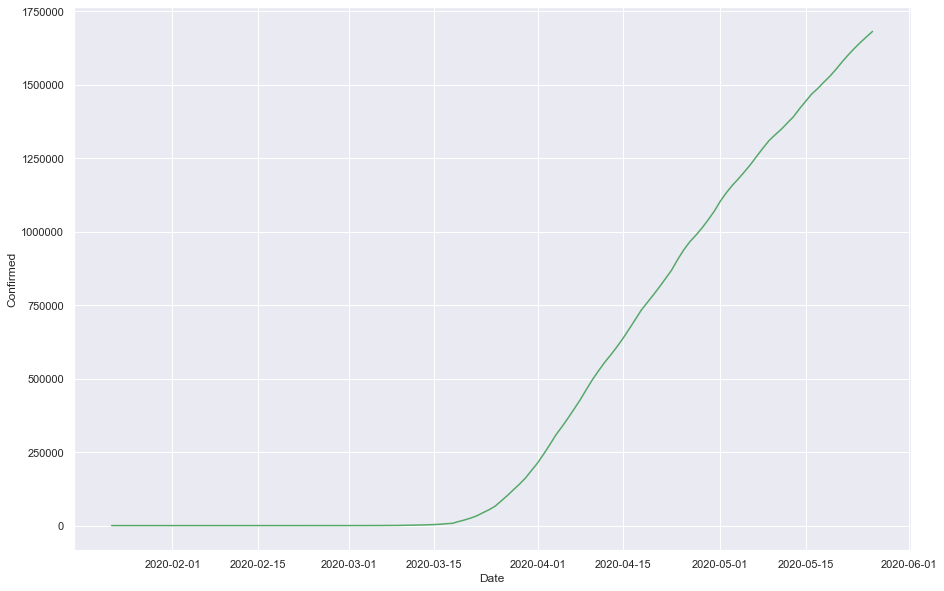

In [19]:
# Visualize confirmed cases in US
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='Date',y='Confirmed',data=us,color = 'g')
plt.show()

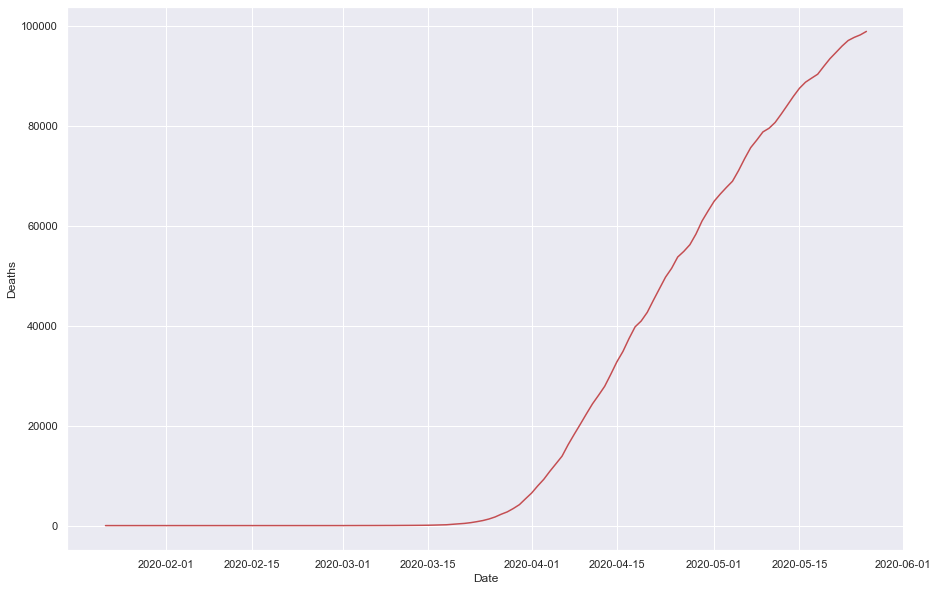

In [20]:
# Visualizing the death cases
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='Date',y='Deaths',data=us,color='r')
plt.show()

In [21]:
# germany
germany = df[df.Country== 'Germany']
germany

,Date,Country,Confirmed,Recovered,Deaths
66,2020-01-22,Germany,0,0,0
254,2020-01-23,Germany,0,0,0
442,2020-01-24,Germany,0,0,0
630,2020-01-25,Germany,0,0,0
818,2020-01-26,Germany,0,0,0
...,...,...,...,...,...
22814,2020-05-22,Germany,179710,159064,8228
23002,2020-05-23,Germany,179986,159716,8261
23190,2020-05-24,Germany,180328,160281,8283
23378,2020-05-25,Germany,180600,161199,8309


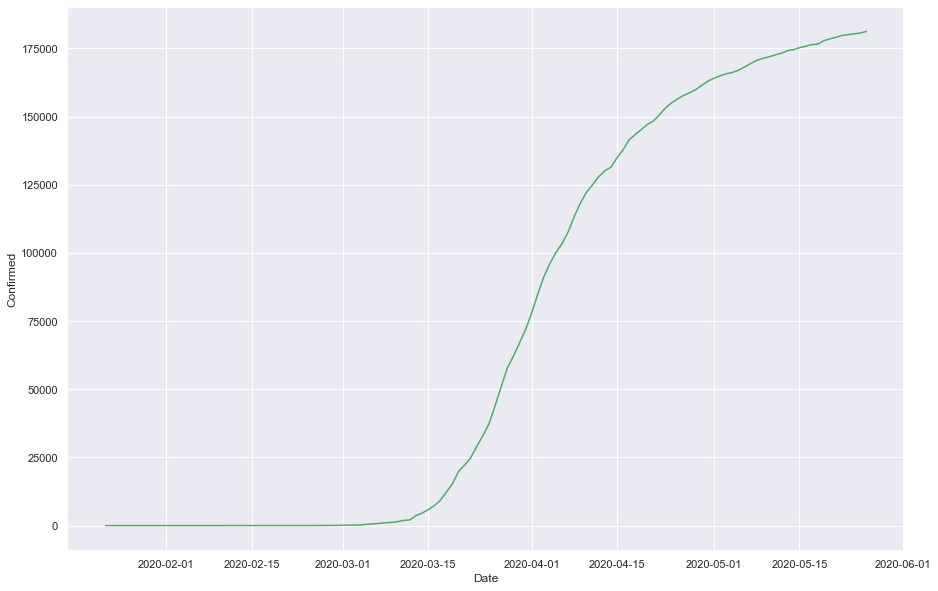

In [22]:
# Visualizing the confirmed cases in Germany
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='Date',y='Confirmed',data=germany,color='g')
plt.show()

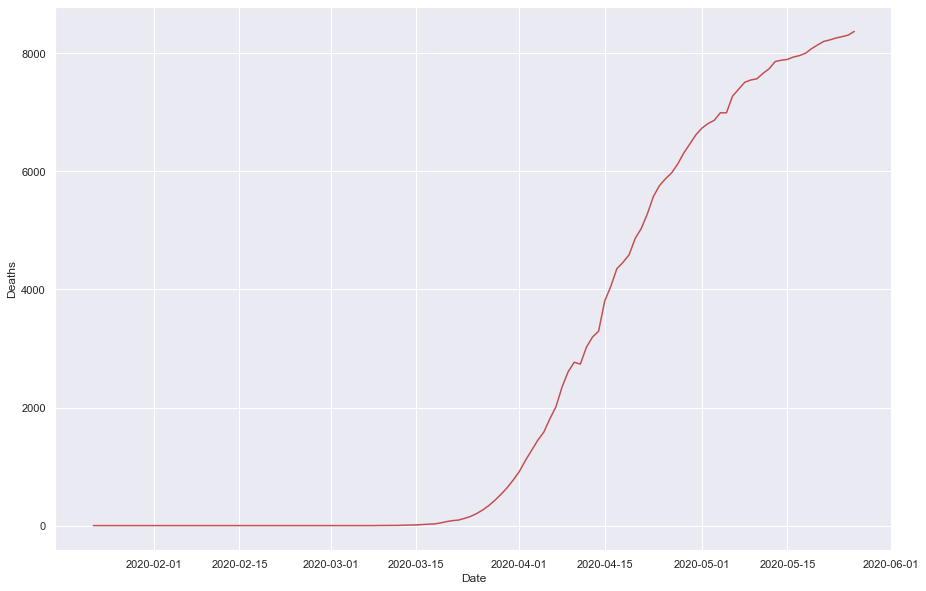

In [23]:
# Visulizating the death cases in Germany
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='Date',y='Deaths',data=germany,color='r')
plt.show()

In [24]:
# Spain
spain = df[df.Country == 'Spain']
spain

,Date,Country,Confirmed,Recovered,Deaths
158,2020-01-22,Spain,0,0,0
346,2020-01-23,Spain,0,0,0
534,2020-01-24,Spain,0,0,0
722,2020-01-25,Spain,0,0,0
910,2020-01-26,Spain,0,0,0
...,...,...,...,...,...
22906,2020-05-22,Spain,234824,150376,28628
23094,2020-05-23,Spain,235290,150376,28678
23282,2020-05-24,Spain,235772,150376,28752
23470,2020-05-25,Spain,235400,150376,26834


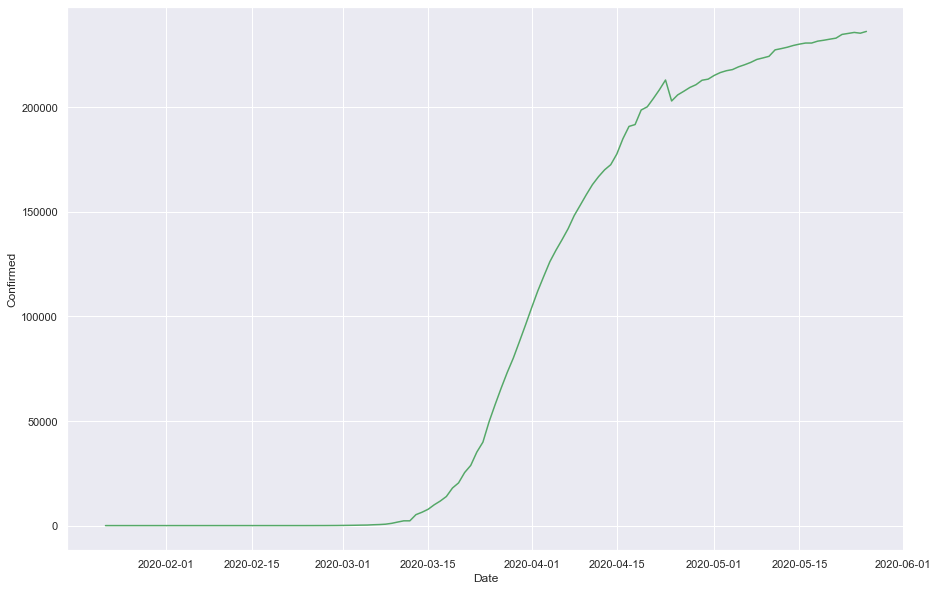

In [25]:
# Visualizing the confirmed cases in germany
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='Date',y='Confirmed',data=spain,color='g')
plt.show()

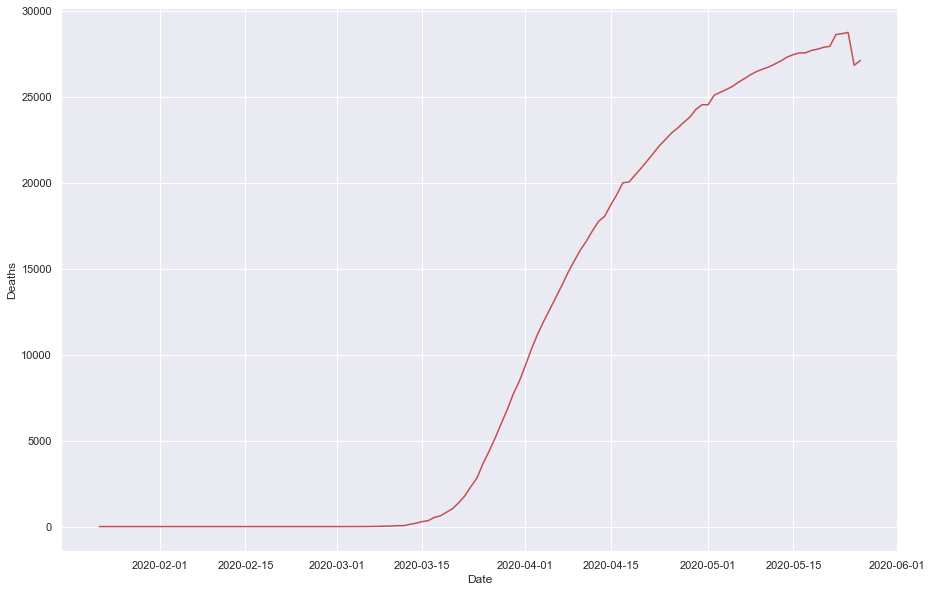

In [26]:
# Visuliazing the death cases in spain
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='Date',y='Deaths',data=spain,color ='r')
plt.show()

In [27]:
#Linear Regression 
from sklearn.model_selection import train_test_split 

In [28]:
us

,Date,Country,Confirmed,Recovered,Deaths
174,2020-01-22,US,1,0,0
362,2020-01-23,US,1,0,0
550,2020-01-24,US,2,0,0
738,2020-01-25,US,2,0,0
926,2020-01-26,US,5,0,0
...,...,...,...,...,...
22922,2020-05-22,US,1600937,350135,95979
23110,2020-05-23,US,1622612,361239,97087
23298,2020-05-24,US,1643246,366736,97720
23486,2020-05-25,US,1662302,379157,98220


In [29]:
# Converting date-time to ordinal
us['Date'] = us['Date'].map(dt.datetime.toordinal)
us.head()

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Country,Confirmed,Recovered,Deaths
174,737446,US,1,0,0
362,737447,US,1,0,0
550,737448,US,2,0,0
738,737449,US,2,0,0
926,737450,US,5,0,0


In [30]:
# Getting the dependent and indepedent variable
# Date - independent variable and Confirmed - Dependent variable
x = us['Date'] 
y = us['Confirmed']

In [31]:
x_train,x_tes,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lr = LinearRegression()

In [34]:
x_train

12958    737514
2430     737458
20854    737556
23486    737570
5250     737473
          ...  
20102    737552
2806     737460
17470    737538
9762     737497
19350    737548
Name: Date, Length: 100, dtype: int64

In [35]:
lr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression()

In [36]:
us.tail()

,Date,Country,Confirmed,Recovered,Deaths
22922,737567,US,1600937,350135,95979
23110,737568,US,1622612,361239,97087
23298,737569,US,1643246,366736,97720
23486,737570,US,1662302,379157,98220
23674,737571,US,1680913,384902,98913


In [37]:
lr.predict(np.array([[737569]]))

array([[1333678.58167458]])

In [50]:
# Let's save this project
import joblib
joblib.dump(lr,'covid-19.pkl')

['covid-19.pkl']